<a href="https://colab.research.google.com/github/ttarom/Anime_recommendation/blob/master/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Let's mount google drive so we can read data files:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
path = "/content/drive/My Drive/Colab Notebooks/datasets_anime/df_anime_final.csv"
df_anime_final = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import time
from timeit import default_timer as timer
from time import strftime
from time import gmtime
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (15,25)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_anime_final.shape

(2246763, 102)

In [ ]:
df_anime_final.head()

,username,anime_id,my_score,my_status,location_x,age,genre_1,genre_x,animes_rated,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,location,gender_Female,gender_Male,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,score,scored_by,...,Magic,Space,Game,Sports,Ecchi,Sci-Fi,Mystery,Drama,Supernatural,Police,Demons,Horror,Psychological,Military,Hentai,Music,Dementia,Romance,Seinen,Historical,Kids,School,Thriller,Mecha,Josei,Parody,Super Power,Shounen,Samurai,Cars,Shoujo,Yaoi,Martial Arts,rating_G - All Ages,rating_None,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,rating_Rx - Hentai
0,xETHEREALx,1185,0,6,CANADA,29,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",131,11895,21,830,48,3,438,239.719676,1991-08-08,2007-09-01 00:00:00,2015-12-28 21:31:40,7.50,0.0,14654,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
1,Jakiepoolh,1185,0,6,CANADA,19,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",165,6099700,12,92,124,1,2518,63.645833,2001-07-12,2017-03-11 00:00:00,2018-05-16 01:29:30,7.89,139.0,3836,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
2,lilstilinski,1185,10,2,CANADA,25,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",21,2250905,19,70,7,3,65,49.586806,1994-12-21,2013-03-02 00:00:00,2018-03-26 01:32:15,7.65,23.0,2971,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
3,D-ohnuts,1185,0,6,CANADA,22,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",205,3941949,0,267,6,0,2022,43.479896,1997-12-26,2014-07-19 00:00:00,2018-05-18 23:09:32,4.64,10.0,2747,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
4,Fantomdruid,1185,8,2,USA,32,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",89,323166,40,949,38,0,121,199.865278,1987-09-24,2010-05-01 00:00:00,2011-02-17 02:49:00,7.36,31.0,12593,USA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0


In [ ]:
#Factorizing the categorials
df_anime_final_frac = df_anime_final
codes, uniques = pd.factorize(df_anime_final_frac['location'])
df_anime_final_frac['location'] = codes
codes, uniques = pd.factorize(df_anime_final_frac['type'])
df_anime_final_frac['type'] = codes
codes, uniques = pd.factorize(df_anime_final_frac['source'])
df_anime_final_frac['source'] = codes
codes, uniques = pd.factorize(df_anime_final_frac['status'])
df_anime_final_frac['status'] = codes
codes, uniques = pd.factorize(df_anime_final_frac['studio'])
df_anime_final_frac['studio'] = codes
#Minimizing to groups of 1000 anime records
df_anime_final_frac = df_anime_final_frac.groupby("anime_id").filter(lambda x: len(x) > 1000)
df_anime_final_frac = df_anime_final_frac[df_anime_final_frac['rank'].notna()].reset_index(drop=True)
#Lets get one hot from gender and remove the non binaray gender to avoid the dummy trap
y = pd.get_dummies((df_anime_final_frac.iloc[:,1]),drop_first=False)
X = df_anime_final_frac[['age','location','gender_Female','gender_Male','Action','Comedy','Harem','Adventure','Fantasy','Slice of Life','Magic','Space','Game','Sports','Ecchi','Sci-Fi','Mystery','Drama','Supernatural','Police','Demons','Horror','Psychological','Military','Hentai','Music','Dementia','Romance','Seinen','Historical','Kids','School','Thriller','Mecha','Josei','Parody','Super Power','Shounen','Samurai','Cars','Shoujo','Yaoi','Martial Arts']]

In [ ]:
#How many outputs should we expect?
df_anime_final_frac['anime_id'].value_counts().count()

615

In [ ]:
df_anime_final_frac.head()

,username,anime_id,my_score,my_status,location_x,age,genre_1,genre_x,animes_rated,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,location,gender_Female,gender_Male,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,score,scored_by,...,Magic,Space,Game,Sports,Ecchi,Sci-Fi,Mystery,Drama,Supernatural,Police,Demons,Horror,Psychological,Military,Hentai,Music,Dementia,Romance,Seinen,Historical,Kids,School,Thriller,Mecha,Josei,Parody,Super Power,Shounen,Samurai,Cars,Shoujo,Yaoi,Martial Arts,rating_G - All Ages,rating_None,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,rating_Rx - Hentai
0,xETHEREALx,33,0,6,CANADA,29,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",131,11895,21,830,48,3,438,239.719676,1991-08-08,2007-09-01 00:00:00,2015-12-28 21:31:40,7.50,0.0,14654,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
1,dawningofwar3,33,0,2,CANADA,29,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",70,312781,1,775,17,0,32,244.884954,1991-07-18,2010-04-05 00:00:00,2012-06-29 01:19:00,8.07,0.0,14728,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
2,ScarletMuse,33,0,6,CANADA,28,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",101,295393,5,506,75,0,406,162.502083,1992-05-02,2010-02-16 00:00:00,2014-06-12 20:51:00,7.70,0.0,9883,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
3,pollo2019,33,10,2,CANADA,38,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",86,57684,19,206,55,4,556,55.870139,1982-07-08,2008-05-02 00:00:00,2017-02-27 19:48:00,7.97,10.0,3360,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
4,Windspirit,33,7,2,CANADA,28,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",83,24117,9,475,4,82,325,126.038194,1992-08-15,2007-11-29 00:00:00,2014-09-01 16:12:00,5.91,248.0,7349,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0


In [ ]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Running the models tp check which one will be used
et_clf = ExtraTreeClassifier(criterion = 'entropy',random_state=0,class_weight = 'balanced')
lsvc = LinearSVC(random_state=0,C=0.01)
sgdc = SGDClassifier(max_iter=1000 ,penalty='elasticnet')
ridge = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
rf = RandomForestClassifier(random_state=0,class_weight = 'balanced')
summary = []
jaccard = []
recall = []
accuracy = []
precision = []
f1 = []

#skipping the for loop without erasing it using continue, runtime execution took hours and I saved the results:
for classifier in [et_clf,sgdc,lsvc,rf]:
  continue
  start = timer()
  clf = MultiOutputClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('', sep='\n')
  print('classifier:',classifier)
  print('', sep='\n')
  jaccard.append(jaccard_score(y_test, y_pred, average='samples'))
  print('Accuracy:',accuracy_score(y_test, y_pred))
  print('jaccard micro score report:',jaccard_score(y_test, y_pred, average='micro'))
  print('jaccard macro score report:',jaccard_score(y_test, y_pred, average='macro'))
  print('jaccard score report:',jaccard_score(y_test, y_pred, average=None), sep='\n')
  recall.append(recall_score(y_test, y_pred, average='samples'))
  print('Macro recall report:',recall_score(y_test, y_pred, average='macro'))
  print('Micro recall report:',recall_score(y_test, y_pred, average='micro'))
  print('Weighted recall report:',recall_score(y_test, y_pred, average='weighted'))
  precision.append(precision_score(y_test, y_pred, average='samples'))
  print('Macro precision_score report:',precision_score(y_test, y_pred, average='macro'))
  print('Micro precision_score report:',precision_score(y_test, y_pred, average='micro'))
  print('Weighted precision_score report:',precision_score(y_test, y_pred, average='weighted')) 
  f1.append(f1_score(y_test, y_pred, average='samples')) 
  print('Macro f1_score report:',f1_score(y_test, y_pred, average='macro'))
  print('Micro f1_score report:',f1_score(y_test, y_pred, average='micro'))
  print('Weighted f1_score report:',f1_score(y_test, y_pred, average='weighted'))  
  print('', sep='\n')
  end = timer()
  print('running time in seconds:',(end - start))
  summary.append([type(classifier).__name__,accuracy_score(y_test, y_pred),(end - start),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')])

![alt text](https://i.pinimg.com/originals/e8/b2/f0/e8b2f030b7319b84e3125942118ed14e.png)

In [ ]:
#Saving my results

#sum_model = summary
#sum_model = pd.DataFrame([summary[:][0],summary[:][1],summary[:][2],summary[:][3]])
#sum_model = sum_model.rename(columns={0:"Model",1:"Accuarcy",2:"Runtime",3:"Precission",4:"Recall",5:"F1score"})
#sum_model.sort_values(by='Runtime',ascending = True).reset_index(drop=True)
#sum_model.sort_values(by='Runtime',ascending = True).reset_index(drop=True).to_csv('drive/My Drive/Colab Notebooks/datasets_anime/sum_model.csv', index=False)

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/datasets_anime/sum_model.csv"
sum_model = pd.read_csv(path)
sum_model
for i in range(len(sum_model)):
  sum_model.iloc[i,2] = strftime("%H:%M:%S", gmtime(sum_model.iloc[i,2]))

In [ ]:
#Review the models
sum_model

,Model,Accuarcy,Runtime,Precission,Recall,F1score
0,ExtraTreeClassifier,0.657592,00:11:58,0.772489,0.911001,0.817507
1,SGDClassifier,0.646048,00:37:08,0.683821,0.689145,0.665035
2,LinearSVC,0.709959,01:58:21,0.727447,0.710652,0.695314
3,RandomForestClassifier,0.662165,03:57:07,0.773532,0.910479,0.818447


So it seems like we should hug trees, the best model is "ExtraTree classifier" by F1 score and... minimal runtime...<br> It takes 12 minutes to compute 615 labels (anime shows) and for Randomforest it takes around 5 hours to get almost the same results.<br> I also condidered KNN which is a fantastic option, but then again, the runtime will take aeons.<br> It is claer that we have a winner and we are gonna use the ExtraTree for predicitng the cold start problem of Anime recommendations.<br>
![alt text](https://img3.goodfon.com/wallpaper/nbig/c/b7/art-anbe-yoshirou-hatsune-4845.jpg)

In [ ]:
#Modeling the selected algorithm
et_clf = ExtraTreeClassifier(criterion = 'entropy',random_state=0,class_weight = 'balanced')
clf = MultiOutputClassifier(et_clf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Funny enough, we can see that demographics (age, gender, location)<br> had little importance as features.

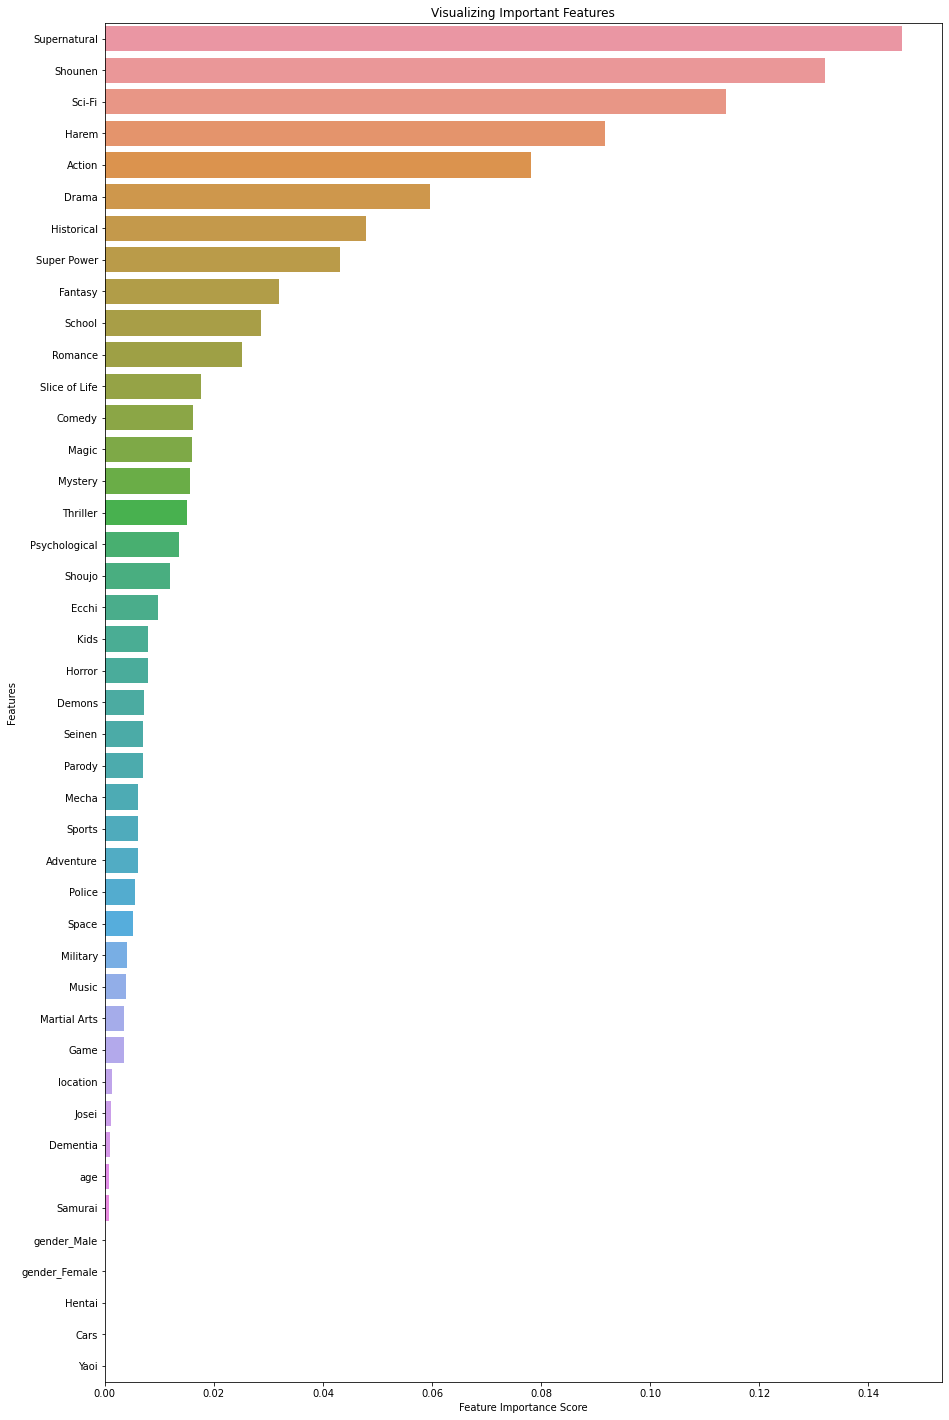

In [ ]:
#Visualize the Feature Importance
feat_impts = []
for i in range(len(y_test.columns)):
  feat_impts.append([clf.estimators_][0][i].feature_importances_)
feat_impts = pd.DataFrame(list(zip(X_test.columns,np.mean(feat_impts, axis=0)))).rename(columns={0:"Feature",1:'Importance'})

feat_impts = feat_impts.sort_values(by='Importance',ascending=False)
sns.barplot(x=feat_impts['Importance'], y=feat_impts['Feature'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

The Jaccard index, or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in the true y.

In [ ]:
print(jaccard_score(y_test, y_pred, average=None))

[1.         0.99740933 1.         0.53867403 1.         0.51827072
 0.99882629 0.3316474  0.99703264 0.29967069 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.9972067  1.         1.         1.         1.
 1.         1.         0.19746193 1.         1.         1.
 1.         0.98773006 1.         0.99662162 0.99117647 0.47619048
 1.         0.42895683 1.         0.30227001 0.3877551  0.26353422
 1.         0.98185941 0.98719441 1.         0.53782895 1.
 1.         0.99607073 1.         1.         1.         1.
 0.98688525 1.         1.         1.         1.         0.47378641
 1.         1.         1.         0.98630137 0.31323529 0.99583911
 1.         1.         1.         1.         1.         1.
 0.99169742 0.9932341  0.99790356 0.35396825 1.         1.
 1.         1.         0.54779412 1.         1.         1.
 1.         1.         0.99600798 1.         0.98510882 1.
 1.         1.         1.         1.         0.20974761 1.
 1.         1.  

In [ ]:
df_model = list(zip(y_test.columns,jaccard_score(y_test, y_pred, average=None)))
df_model = pd.DataFrame(df_model)
df_model = pd.DataFrame(df_model).rename(columns={0:"anime_id",1:"Probability"})     

In [ ]:
local = df_anime_final['anime_id'][df_anime_final['anime_id'].isin(df_model['anime_id'])]
df_local = df_anime_final[df_anime_final['anime_id'].isin(local)]
df_model = pd.merge(df_model, df_local[['username','anime_id','my_score']], left_on = 'anime_id', right_on = 'anime_id', how = 'inner')
df_model['adjustesd_score'] = df_model.Probability * df_model.my_score
df_model.drop_duplicates(keep="first", inplace=False)
df_model_frac = df_model[df_model['Probability'] > 0]

In [ ]:
! pip install surprise
import surprise
import surprise as sp
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [ ]:
kSplit = surprise.model_selection.split.KFold(n_splits=5, shuffle=True) # split data into folds. 
reader = Reader(rating_scale=(0, 10))
sim_options = {'name': 'cosine','user_based': False}  # compute  similarities between items
data = Dataset.load_from_df(df_model_frac[['username', 'anime_id', 'adjustesd_score']][df_model_frac['adjustesd_score']>0].sample(frac=0.01), reader)
analysis_df = []
algo = 0
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=2, verbose=False)
    temp_algo = pd.DataFrame.from_dict(results).mean(axis=0)
    if(algo > temp_algo[0]):
      algo = temp_algo[0]
      model =  algorithm
    else:
      model = SVD()
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    analysis_df.append(tmp)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...


In [ ]:
analysis_df = pd.DataFrame(analysis_df).sort_values(by='test_rmse').reset_index(drop=True)
analysis_df['RMSE^-1'] = analysis_df['test_rmse'] ** -1
analysis_df

,test_rmse,fit_time,test_time,Algorithm,RMSE^-1
0,1.996581,0.240021,0.019887,SVD,0.500856
1,2.030594,0.364470,0.024106,SVDpp,0.492467
2,2.053376,0.317004,0.025645,KNNBaseline,0.487003
3,2.066849,0.011912,0.065540,BaselineOnly,0.483828
4,2.769844,0.305721,0.027650,KNNBasic,0.361031
5,2.787995,0.402741,0.018659,CoClustering,0.358681
6,2.803419,0.458197,0.019581,NMF,0.356707
7,2.871543,0.038384,0.019645,SlopeOne,0.348245
8,2.873749,0.342300,0.025988,KNNWithMeans,0.347978
9,2.886113,0.392325,0.024657,KNNWithZScore,0.346487


In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/datasets_anime/surprise_results.csv"
#surprise_results = pd.read_csv(path)
#surprise_results

The Model changes according to the data.<br> We will inherit the lowest RMSE score model.

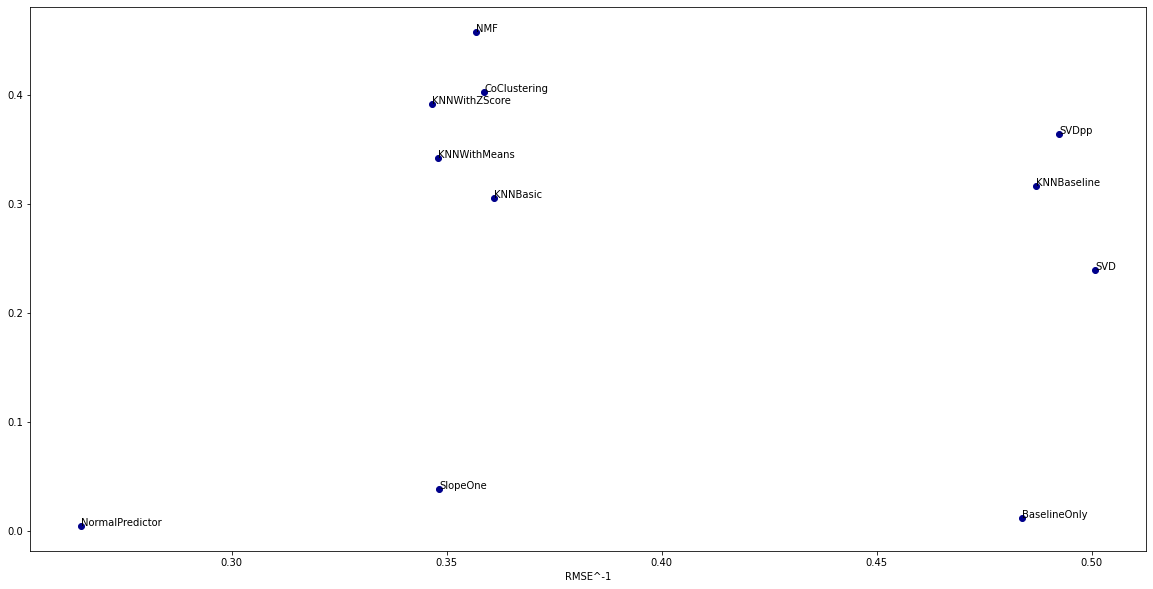

In [ ]:
ax = analysis_df.set_index('RMSE^-1')['fit_time'].plot(style='o', c = 'DarkBlue', figsize = (20, 10))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(analysis_df['RMSE^-1'], analysis_df['fit_time'], analysis_df['Algorithm'], ax)

In [ ]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df_model[['username', 'anime_id', 'adjustesd_score']], reader)
trainset, testset = train_test_split(data, test_size=0.3)

algo = model
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 2.9885


2.9884743532943716

In [ ]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [ ]:
df_user_best = df.sort_values(by='err')
df_user_worst = df.sort_values(by='err')

In [ ]:
df_user_best = pd.merge(df_user_best, df_anime_final.drop_duplicates(['title']), left_on = 'iid', right_on = 'anime_id', how = 'left')
df_user_worst = pd.merge(df_user_worst, df_anime_final.drop_duplicates(['title']), left_on = 'iid', right_on = 'anime_id', how = 'left')

In [ ]:
df_model = df_model[['anime_id','adjustesd_score']].groupby('anime_id').mean()

In [ ]:
df_user_best = pd.merge(df_user_best, df_model, left_on = 'anime_id', right_on = 'anime_id', how = 'inner').drop_duplicates(['title'])
df_user_worst = pd.merge(df_user_worst, df_model, left_on = 'anime_id', right_on = 'anime_id', how = 'inner').drop_duplicates(['title'])

In [ ]:
df_user_best = df_user_best.rename(columns={"genre_x":"Genre",'err':'residual_err'})
df_user_worst = df_user_worst.rename(columns={"genre_x":"Genre",'err':'residual_err'})

In [ ]:
df_user_best = df_user_best[['residual_err','adjustesd_score','anime_id','genre_1','score','popularity', 'title', 'Genre','image_url']]
df_user_worst = df_user_worst[['residual_err','adjustesd_score','anime_id','genre_1','score','popularity', 'title', 'Genre','image_url']]

In [ ]:
df_user_best = df_user_best.sort_values('adjustesd_score', ascending = False)[:30].reset_index(drop=True)
df_user_worst = df_user_worst.sort_values(by='adjustesd_score', ascending = False)[-30:].reset_index(drop=True)

FINALLY! THE RESULTS ARE IN!<br>
![](https://vip.socio-corp.jp/wp-content/uploads/sites/3/2014/10/ap-3.png?w=580) 

In [ ]:
#Top rated for this user
df_user_best

,residual_err,adjustesd_score,anime_id,genre_1,score,popularity,title,Genre,image_url
0,0.009355,7.343882,2904,Action,8.95,22,Code Geass: Hangyaku no Lelouch R2,"Action, Military, Sci-Fi, Super Power, Drama, ...",https://myanimelist.cdn-dena.com/images/anime/...
1,0.000000,7.275814,199,Adventure,8.92,39,Sen to Chihiro no Kamikakushi,"Adventure, Supernatural, Drama",https://myanimelist.cdn-dena.com/images/anime/...
2,0.000000,7.272359,1535,Mystery,8.67,1,Death Note,"Mystery, Police, Psychological, Supernatural, ...",https://myanimelist.cdn-dena.com/images/anime/...
3,0.000000,7.051478,30276,Action,8.73,5,One Punch Man,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",https://myanimelist.cdn-dena.com/images/anime/...
4,0.000000,6.832998,1575,Action,8.79,9,Code Geass: Hangyaku no Lelouch,"Action, Military, Sci-Fi, Super Power, Drama, ...",https://myanimelist.cdn-dena.com/images/anime/...
5,0.007479,6.818431,431,Adventure,8.73,89,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",https://myanimelist.cdn-dena.com/images/anime/...
6,0.000375,6.791904,317,Action,7.88,500,Final Fantasy VII: Advent Children,"Action, Super Power, Fantasy",https://myanimelist.cdn-dena.com/images/anime/...
7,0.000000,6.787770,32281,Supernatural,9.19,33,Kimi no Na wa.,"Supernatural, Drama, Romance, School",https://myanimelist.cdn-dena.com/images/anime/...
8,0.000000,6.687865,4181,Slice of Life,9.01,55,Clannad: After Story,"Slice of Life, Comedy, Supernatural, Drama, Ro...",https://myanimelist.cdn-dena.com/images/anime/...
9,0.000000,6.686698,6547,Action,8.31,7,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",https://myanimelist.cdn-dena.com/images/anime/...


In [ ]:
#Bottom rated for this user
df_user_worst

,residual_err,adjustesd_score,anime_id,genre_1,score,popularity,title,Genre,image_url
0,0.0,0.908604,8086,Action,7.76,448,Densetsu no Yuusha no Densetsu,"Action, Adventure, Magic, Fantasy, Shounen",https://myanimelist.cdn-dena.com/images/anime/...
1,0.0,0.905656,10165,Slice of Life,8.52,136,Nichijou,"Slice of Life, Comedy, School",https://myanimelist.cdn-dena.com/images/anime/...
2,0.0,0.872938,6007,Adventure,7.95,852,Ookami to Koushinryou II: Ookami to Kohakuiro ...,"Adventure, Historical, Romance, Fantasy",https://myanimelist.cdn-dena.com/images/anime/...
3,0.0,0.854275,6862,Music,7.87,985,K-On!: Live House!,"Music, Slice of Life, Comedy, School",https://myanimelist.cdn-dena.com/images/anime/...
4,0.0,0.853862,16001,Comedy,8.13,585,Kokoro Connect: Michi Random,"Comedy, Drama, Romance, School, Slice of Life,...",https://myanimelist.cdn-dena.com/images/anime/...
5,0.0,0.831020,33506,Action,7.69,259,Ao no Exorcist: Kyoto Fujouou-hen,"Action, Demons, Supernatural, Fantasy, Shounen",https://myanimelist.cdn-dena.com/images/anime/...
6,0.0,0.816992,11179,Comedy,7.45,699,Papa no Iukoto wo Kikinasai!,"Comedy, Romance, Slice of Life",https://myanimelist.cdn-dena.com/images/anime/...
7,0.0,0.810069,16918,Comedy,8.16,506,Gin no Saji,"Comedy, School, Shounen, Slice of Life",https://myanimelist.cdn-dena.com/images/anime/...
8,0.0,0.806262,23673,Comedy,7.41,357,Ookami Shoujo to Kuro Ouji,"Comedy, Romance, School, Shoujo",https://myanimelist.cdn-dena.com/images/anime/...
9,0.0,0.799103,8676,Slice of Life,7.51,372,Amagami SS,"Slice of Life, Comedy, Romance, School",https://myanimelist.cdn-dena.com/images/anime/...
